# Ex 1


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm
import arviz as az

observations_k = [10,15,20,5,25,12,18]
observations_n = [100,120,150,90,200,110,130]

with pm.Model() as model:
    p = pm.Beta('p', alpha=2, beta=2, shape=7)
    k = pm.Binomial('k',n=observations_n, observed=observations_k, p=p)
    p_mean = pm.Deterministic('p_mean', p.mean())
    trace = pm.sample(1_000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


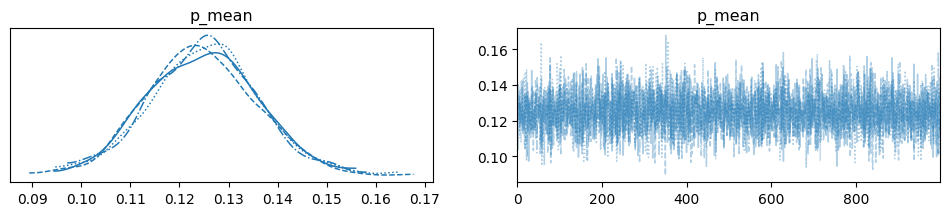

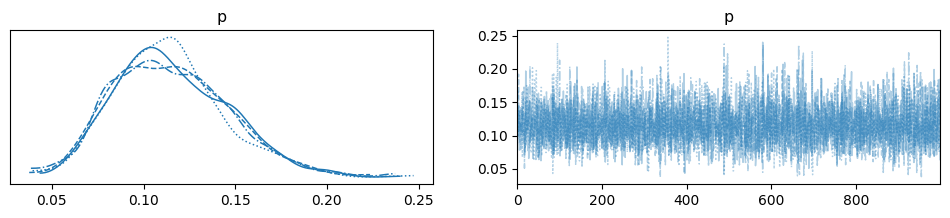

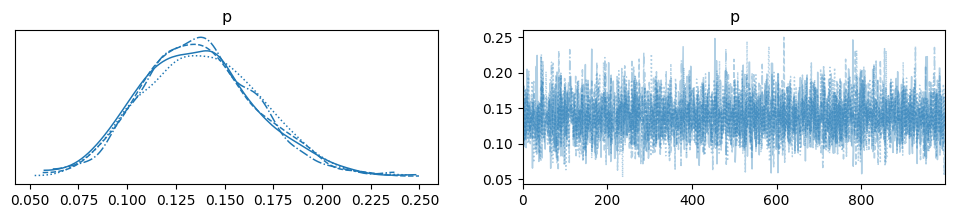

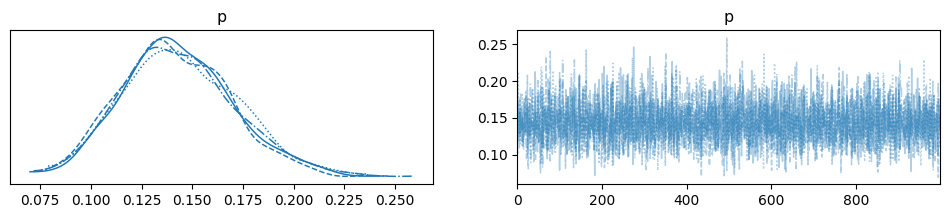

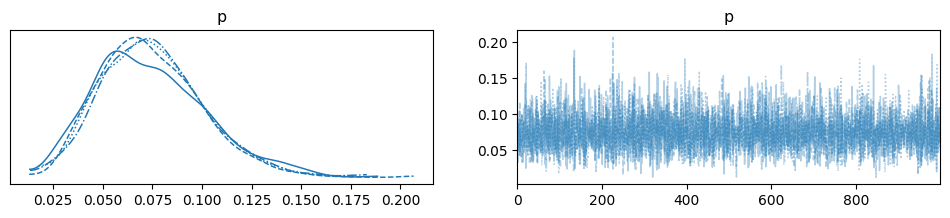

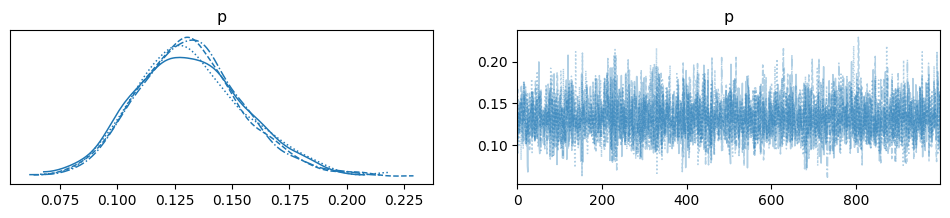

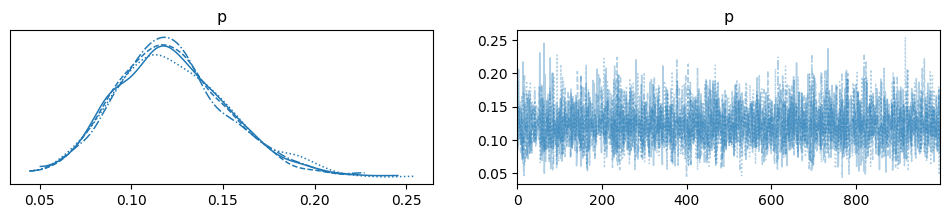

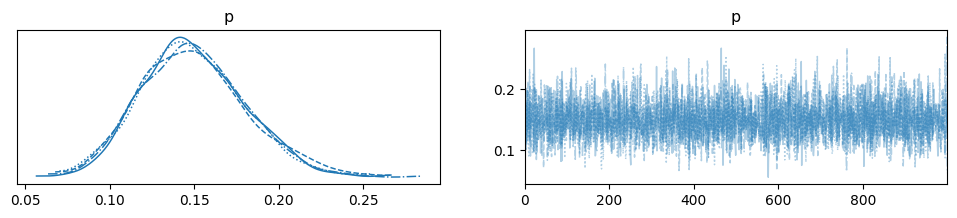

In [14]:
az.plot_trace(trace, var_names=['p_mean'])

for i in range(7):
    az.plot_trace(trace, var_names=['p'], coords={'p_dim_0': i})
plt.show()



# Ex 2

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_0, lambda_1, lambda_2, lambda_3, lambda_4]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


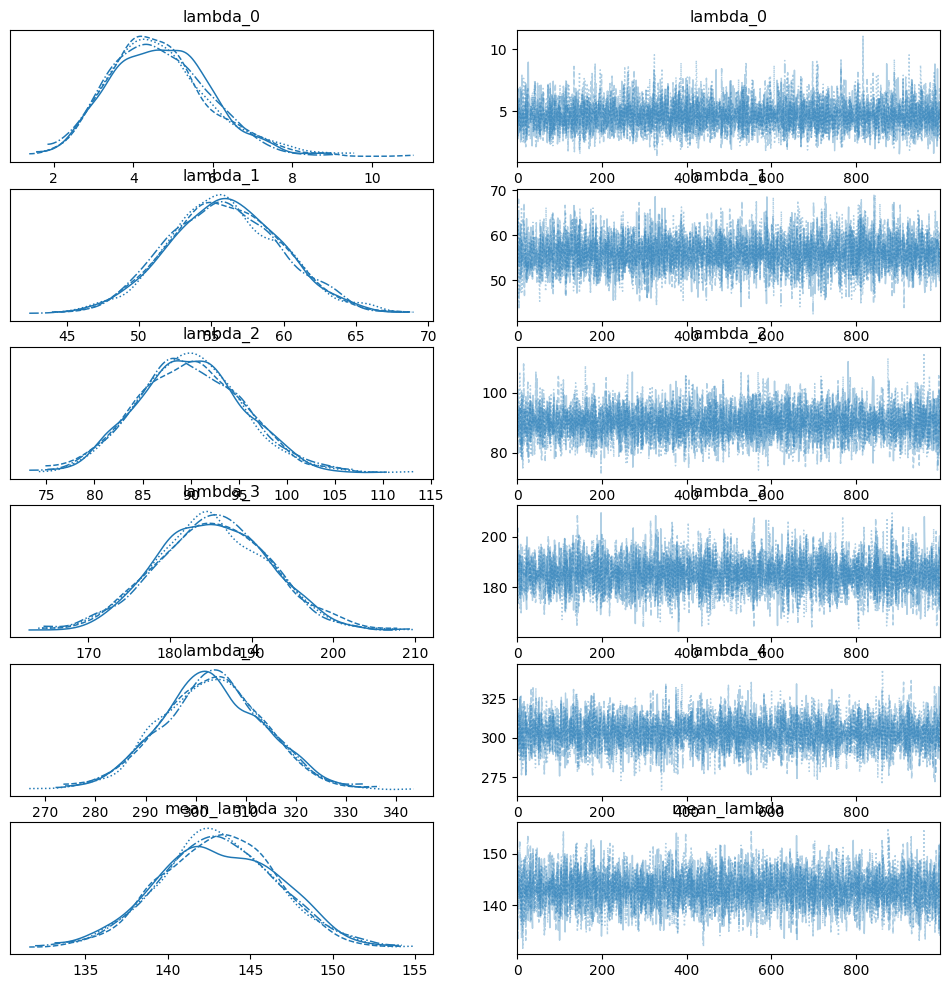

In [19]:
df = pd.read_csv('trafic.csv')
values = df.to_numpy()
# print(values)

def get_intervals(values):
    i_1 = values[0:180]
    i_2 = values[180:240]
    i_3 = values[240:720]
    i_4 = values[720:900]
    i_5 = values[900:1200]
    return [i_1, i_2, i_3, i_4, i_5]

intervals = get_intervals(values)
interval_lengths = [len(i) for i in intervals]

traffic_intensities = [1, 1.5, 1, 2, 1]

with pm.Model() as model_2:
    lambdas = [pm.Exponential(f'lambda_{i}', traffic_intensities[i]) for i in range(5)]
    traffic_vals = [pm.Poisson(f'traffic_{i}', lambdas[i], observed=intervals[i][1]) for i in range(5)]
    
    lambdas_total = sum([lambdas[i] * interval_lengths[i] for i in range(5)])
    mean_lambda = pm.Deterministic('mean_lambda', lambdas_total / sum(interval_lengths)) # medie ponderata
    
    trace = pm.sample(1_000, return_inferencedata=True)
    
az.plot_trace(trace, var_names=['lambda_0', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4', 'mean_lambda'])
plt.show()